In [0]:
# https://keras.io/
!pip install -q keras
import keras

## This iterations will observe


1.  Validation accuracy to be checked with least number of  filters (and parameters)
2.   Maximize accuracy by improving the architecture with Drop out and batch normalization 
3.   Experiment with Fully Connected layer and observe the advantage of Convolution layer over Fully connected layer, given all else is constant




In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


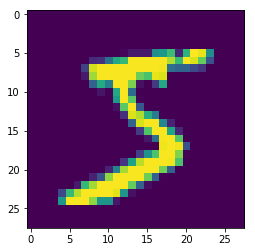

In [236]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [239]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [242]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1))) #26x26x16, RF 3x3
model.add(BatchNormalization())


model.add(Conv2D(16, (3,3), activation='relu')) # 24x24x16 , RF 5x5
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu')) # 22x22x32 , RF 7x7
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11x11x32 , RF 14x14
# model.add(Dense(8))
model.add(Conv2D(8, (1, 1), activation='relu')) # 11x11x16
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Conv2D(16, (3,3), activation='relu')) # 9x9x32 , RF 16x16
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu')) # 7x7x64 , RF 18x18
model.add(BatchNormalization())

model.add(Conv2D(16, 1, activation='relu')) # 7x7x16

model.add(Conv2D(10, 7)) # 1x1x10
model.add(Flatten()) # 1x10
# model.add(Dense(10))
model.add(Activation('softmax'))
 

In [243]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_83 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_84 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_85 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [245]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.1506 - acc: 0.9532 - val_loss: 0.0548 - val_acc: 0.9826
Epoch 2/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0548 - acc: 0.9832 - val_loss: 0.0359 - val_acc: 0.9875
Epoch 3/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0415 - acc: 0.9872 - val_loss: 0.0278 - val_acc: 0.9905
Epoch 4/10
60000/60000 [==============================] - 21s 352us/step - loss: 0.0355 - acc: 0.9890 - val_loss: 0.0306 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0303 - acc: 0.9905 - val_loss: 0.0274 - val_acc: 0.9901
Epoch 6/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0274 - acc: 0.9910 - val_loss: 0.0307 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0225 - acc: 0.9926 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [247]:
print(score)

[0.026192511223663315, 0.9916]


In [0]:
y_pred = model.predict(X_test)

In [249]:
print(y_pred[:9])
print(y_test[:9])

[[1.51295657e-10 8.92958624e-11 1.09352463e-07 9.11480470e-07
  8.19472474e-13 2.44413051e-14 1.47398715e-18 9.99998808e-01
  3.92511357e-09 1.05039334e-07]
 [5.79607729e-07 2.99485947e-09 9.99999046e-01 2.09766492e-11
  1.55246624e-08 9.80818667e-15 4.92008247e-08 8.28306979e-10
  1.92050308e-07 3.50660646e-12]
 [2.46871945e-09 9.99996781e-01 2.17438043e-07 5.03137052e-08
  5.04058448e-07 1.22562284e-07 6.85879854e-07 1.21316532e-06
  4.76212335e-07 5.87228544e-10]
 [9.99297738e-01 8.05362585e-14 4.80623008e-08 2.07669237e-09
  7.95810706e-08 6.12336315e-09 2.96165254e-05 8.05524820e-08
  3.32762793e-05 6.39168429e-04]
 [1.54054096e-11 7.15915729e-11 1.40711209e-09 9.55457380e-11
  9.99983668e-01 2.14348417e-12 6.36543818e-10 1.70747565e-11
  9.50677531e-07 1.54199661e-05]
 [4.25807523e-09 9.99988437e-01 4.69526526e-07 2.85481350e-09
  1.69024315e-06 4.00293132e-09 4.68331400e-08 9.00540635e-06
  3.64852895e-07 2.14404539e-09]
 [3.08077761e-17 1.58881086e-08 1.02575992e-09 1.32395125e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

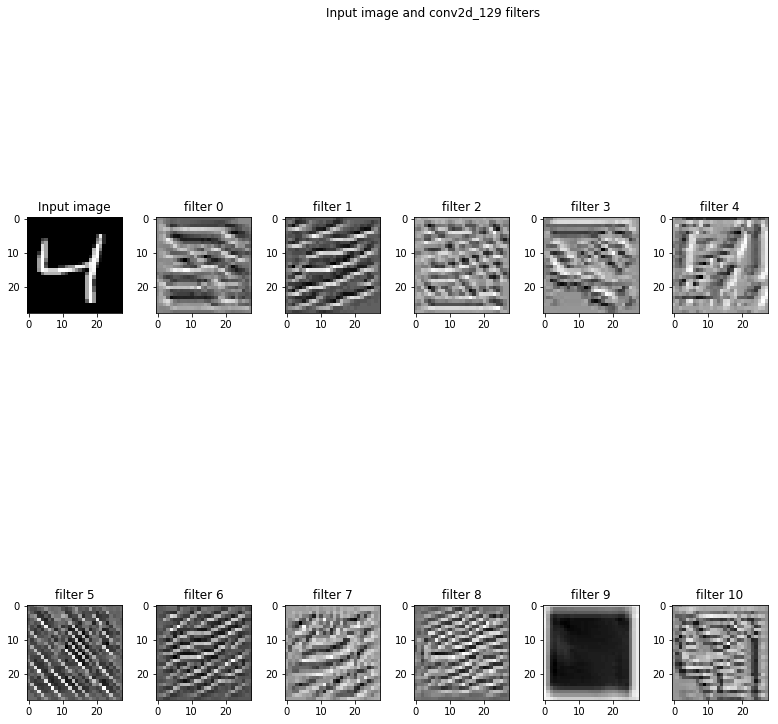

In [252]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_129'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## Observation

#### Without Dense layer
Validation Accuracy:99.16%;
Parameters: 20.7k


#### With Dense layer
Validation Accuracy:99.07%;
 Parameters: 28k


1.   With all configurations remaining same, replacing 1x1 convolution layer by dense layer showed no significant improvement in the accuracy but significantly increased the number of parameters. The duration of each epoch also increased



## Scope for improvement




1.   Owing to the low trade off,  Fully Connected Layer needs to be removed
2.   Prevent network overfitting.
2.   Improve accuracy by improving architecture further






